delaunay.ipynb

Discussion: This Jupyter notebook investigates triangulations.

Licensing: This code is distributed under the GNU LGPL license.
    
Modified: 29 October 2016

Author: John Burkardt, Lukas Bystricky

In [1]:
# Import necessary libraries and set plot option
%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.spatial as spatial

Using matplotlib backend: agg


# Triangulations #

In this module we will look at some problems related to the idea of
organizing a set of points into triangles.  Such an arrangement is
called a triangulation, and normally, it is understood that it has
the properties that no two triangle edges cross, and that no more
triangles can be can be added.

We will look at
* how a triangulation can be represented;
* how to write a function to read triangulation files;
* how to plot a triangulation
* how a Delaunay triangulation is the "best" of all possible triangulations;
* how the polygonal shape created by the triangulation can be analyzed;
* how the Delaunay triangulation is related to the Voronoi diagram.

# Representing a triangulation #

Ordinarily, before we have a triangulation, we first have a set of N nodes,
whose coordinates are stored in an Nx2 array.  The natural way to describe
a triangulation, then, is as an Mx3 array, with each row corresponding to
a particular triangle, described by listing in counterclockwise order the
indices of the nodes that form it.

Download the files:
  http://people.sc.fsu.edu/~jburkardt/classes/urop_2016/ten_tri1.png
This is a picture of a triangulation.  There are N=10 nodes and M=10 triangles.
Choose a numbering for the points and for the triangles, and then create
the Nx2 node array and the Mx3 triangle array that correspond to this picture
and print them.  

In the node coordinate array "xy", the order of the data is up to you; the order
you choose here will affect the values you put into the triangle array "t".

In [2]:
xy = np.array ( [ \
  [  0.0,   4.0 ], \
  [  1.0,  13.0 ], \
  [  4.0,   7.0 ], \
  [  5.0,   2.0 ], \
  [  6.0,  15.0 ], \
  [  9.0,  10.0 ], \
  [ 12.0,   3.0 ], \
  [ 13.0,  14.0 ], \
  [ 15.0,   5.0 ], \
  [ 17.0,  11.0 ] ] )

t = np.array ( [ \
  [ 0,  3,  6 ], \
  [ 0,  6,  2 ], \
  [ 2,  6,  8 ], \
  [ 0,  2,  1 ], \
  [ 2,  9,  5 ], \
  [ 1,  2,  5 ], \
  [ 2,  8,  9 ], \
  [ 1,  5,  9 ], \
  [ 1,  9,  4 ], \
  [ 4,  9,  7 ] ] )

# Plotting a triangulation #

After you get the arrays set up, see if you can make a plot of the triangulation
using the "triplot()" function:

  plt.figure ( )
  plt.gca().set_aspect('equal')
  plt.triplot ( xy[:,0], xy[:,1], t )

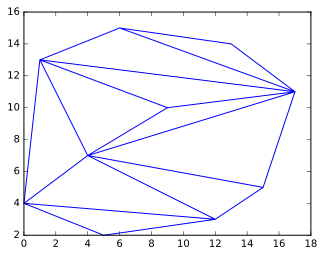

In [3]:
plt.figure ( )
plt.gca().set_aspect('equal')
plt.triplot ( xy[:,0], xy[:,1], t )

# Reading a Triangulation from a file #

For our next experiment, we will try to read node and triangle
information from a file.

You will need to copy the following files:
  http://people.sc.fsu.edu/~jburkardt/classes/urop_2016/ten_nodes.txt
  http://people.sc.fsu.edu/~jburkardt/classes/urop_2016/ten_tri2.txt

The first file contains a 10x2 table of node coordinates.
The second contains a 10x3 table of triangles (triples of node indices)

Try to write programs

def read_nodes ( filename ):
  ***
  return xy

and

def read_triangles ( filename ):
  ***
  return t

which get the data from the files.

[[0.0, 4.0], [1.0, 13.0], [4.0, 7.0], [5.0, 2.0], [6.0, 15.0], [9.0, 10.0], [12.0, 3.0], [13.0, 14.0], [15.0, 5.0], [17.0, 11.0]]


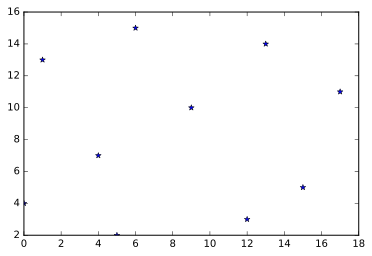

In [12]:
# Read the node file #
#
def read_nodes ( filename ):
    
  input = open ( filename, 'r' )

  xy_list= []
  for line in input:
    line = line.strip ( )
    xy_list.append ( [ float ( x ) for x in line.split ( ) ] )

  input.close ( )

  xy = np.asarray ( xy_list )
    
  return xy

print ( xy )
#
#  Test the function.
#
xy = read_nodes ( 'ten_nodes.txt' )
plt.plot ( xy[:,0], xy[:,1], 'b*' )

[[0 3 6]
 [0 6 2]
 [2 6 8]
 [0 2 1]
 [2 9 5]
 [1 2 5]
 [2 8 9]
 [1 5 9]
 [1 9 4]
 [4 9 7]]


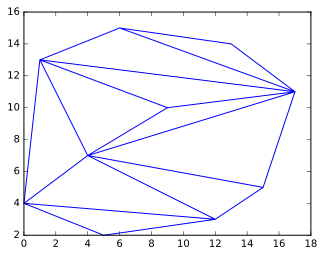

In [13]:
# Read the triangle file #
#
def read_triangles ( filename ):
    
  input = open ( filename, 'r' )

  t_list= []
  for line in input:
    line = line.strip ( )
    t_list.append ( [ int ( x ) for x in line.split ( ) ] )

  input.close ( )

  t = np.asarray ( t_list )
    
  return t

print ( t )
#
#  Test the function.
#
xy = read_nodes ( 'ten_nodes.txt' )
t = read_triangles ( 'ten_tri1.txt' )

plt.figure ( )
plt.gca().set_aspect('equal')
plt.triplot ( xy[:,0], xy[:,1], t )

In [ ]:
# The minimum angle of a triangulation #

For a given set of points, there are many possible triangulations.
Is there any reason to prefer one triangulation over another?
One feature that is usually undesirable is the existence of
small angles in the triangles.  Suppose that for any triangulation
T we let Theta(T) be the smallest angle in any triangle in that
triangulation.  Then we could say that triangulation T2 is better
than T1 if Theta(T1) < Theta(T2), that is, the smallest angle in
T2 is bigger than that in T1.

Write a function which takes the values of x, y, and t, and
computes the value of Theta(T1), of the following form:

def theta ( xy, t ):
  ***
  return min_angle

Test your function on the triangulation T1 defined by the 
nodes "ten_nodes.txt" and "ten_tri1.txt".

In [20]:
# Compute minimum angle of a triangulation
#
#  Make output in degrees because no one thinks in radians!
#

def theta ( xy, t ):
  import numpy as np
  from numpy.linalg import norm
  n = xy.shape[0]
  m = t.shape[0]
  min_angle = np.pi
  for j in range ( 0, m ):
    a = t[j,0]
    b = t[j,1]
    c = t[j,2]
    bma = norm ( xy[b,:] - xy[a,:] )
    cmb = norm ( xy[c,:] - xy[b,:] )
    amc = norm ( xy[a,:] - xy[c,:] )
    cosa = ( bma**2 + amc**2 - cmb**2 ) / ( 2 * bma * amc )
    cosb = ( cmb**2 + bma**2 - amc**2 ) / ( 2 * cmb * bma )
    cosc = ( amc**2 + cmb**2 - bma**2 ) / ( 2 * amc * cmb )
    anga = np.arccos ( cosa )
    angb = np.arccos ( cosb )
    angc = np.arccos ( cosc )
    min_angle = min ( min_angle, anga )
    min_angle = min ( min_angle, angb )
    min_angle = min ( min_angle, angc )
  min_angle = min_angle * 180.0 / np.pi
  return min_angle
#
#  Test on our sample triangulation.
#
xy = read_nodes ( 'ten_nodes.txt' )
t = read_triangles ( 'ten_tri1.txt' )
min_angle = theta ( xy, t )
print ( 'Minimum angle for triangulation T1 is %g degrees' % ( min_angle ))

Minimum angle for triangulation T1 is 9.97771 degrees


# The Delaunay Triangulation #

The Delaunay triangulation T of a given set of points maximizes 
the value of Theta.  For this reason, given a set of points, we 
(almost) always choose the Delaunay triangulation.

It turns out that for the set of points in the file "ten_nodes.txt",
the triangles in "ten_tri1.txt" are a "bad" triangulation, while
the triangles in "ten_tri2.txt" are the Delaunay triangulation.

Use your theta function to evaluate the minimum angle in triangulation T2.

Also, plot triangulation T2, and look at how it differs from T1.
You should agree that the minimum angle in T2 is bigger than the
minimum angle in T1.

Minimum angle for triangulation T2 is 26.9958 degrees


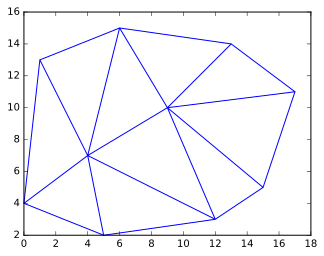

In [22]:
#
#  Test on our sample triangulation.
#
xy = read_nodes ( 'ten_nodes.txt' )
t = read_triangles ( 'ten_tri2.txt' )
min_angle = theta ( xy, t )
print ( 'Minimum angle for triangulation T2 is %g degrees' % ( min_angle ))

plt.figure ( )
plt.gca().set_aspect('equal')
plt.triplot ( xy[:,0], xy[:,1], t )

# Computing Properties of a triangulated region #

In the polygons notebook, we were able to compute properties
of the polygon, such as area and centroid, by working
with the triangles.  The same approach works for a region
created by starting with points and determining their
triangulation.  One difference is that a shape created
by triangulating points will always be convex, that is,
there will be no notches or indentations in the boundary,
and the triangulated shape will probably have a number of
points and triangles in the interior; a triangulated
polygon has all its points on the boundary, and it
can have a very nonconvex (indented) boundary.  But
the area and centroid are computed the same way.

For the same reason, sampling is done the same way,
and so integrals can also be approximated over the region.
I won't make you repeat these calculations for the triangulated
region but stop for one moment, go back to the polygon notebook
and convince yourself that everything you did there will still
work for this new but very similar case.

# Relationship between Voronoi Diagram and Delaunay Triangulation

Mathematically, the Voronoi diagram and the Delaunay
triangulation are duals of each other.  The information
from one object can be used to reconstruct the other one.

One way to see this is to start with a set of points and on
a single plot show both the Delaunay triangulation and the
Voronoi diagram.  The generator points can be regarded as
the "capitals" of states defined by the Voronoi polygons.
The Delaunay triangulation essentially builds roads between
neighboring capital cities.  Every road crosses the state
line at a 90 degree angle, and is half in one state and half
in the other.

As you saw in the 2D geometry notebook, it's possible to compute
the Voronoi diagram and then draw it by the commands
  vor = scipy.spatial.Voronoi ( xy )
  scipy.spatial.voronoi_plot_2d ( vor )
and the Delaunay triangulation can be compute and drawn by
  t = scipy.spatial.Delaunay ( xy )
  matplotlib.pyplot.triplot ( xy[:,0], xy[:,1], t )
However, I haven't figure out how to show both figures on a single plot.

For the xy data we have, compute and plot the Voronoi diagram and
Delaunay triangulation.

Oh my, now it works!

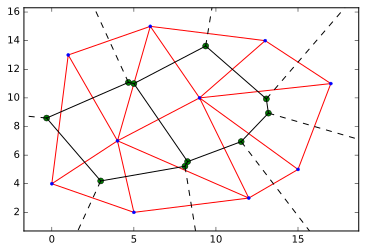

In [26]:
vor = spatial.Voronoi ( xy )
spatial.voronoi_plot_2d ( vor )
t = spatial.Delaunay ( xy )
plt.triplot ( xy[:,0], xy[:,1], t.simplices.copy() )